In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("mushroom.data")
#df = pd.DataFrame(data)
df = pd.DataFrame(data, columns=data.columns.values)
df.describe()


,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [2]:
data[['habitat', 'edibility']].groupby('habitat').describe().transpose()

habitat              d     g    l    m     p    u    w
edibility count   3148  2148  832  292  1144  368  192
          unique     2     2    2    2     2    2    1
          top        e     e    p    e     p    p    e
          freq    1880  1408  592  256  1008  272  192

(array([1408.,    0.,    0.,    0.,  256.,    0.,    0.,    0.,   96.,
           0.,    0.,    0., 1880.,    0.,    0.,    0.,  136.,    0.,
           0.,    0.,  192.,    0.,    0.,    0.,  240.]),
 array([0.  , 0.24, 0.48, 0.72, 0.96, 1.2 , 1.44, 1.68, 1.92, 2.16, 2.4 ,
        2.64, 2.88, 3.12, 3.36, 3.6 , 3.84, 4.08, 4.32, 4.56, 4.8 , 5.04,
        5.28, 5.52, 5.76, 6.  ]),
 <BarContainer object of 25 artists>)

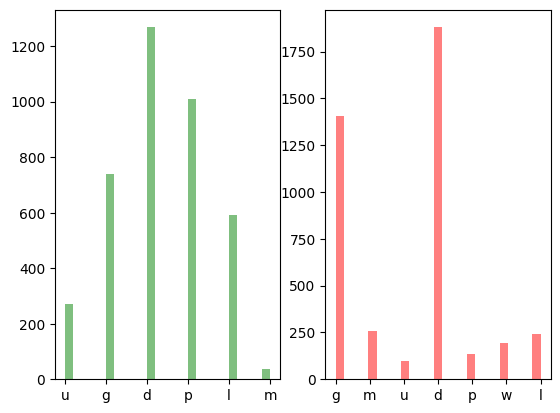

In [3]:
edibility = df[df['edibility'] == 'p']
non_edibility = df[df['edibility'] == 'e']
fig, axis = plt.subplots(1, 2)
axis[0].hist(edibility['habitat'], alpha=0.5, bins=25, color='green')
axis[1].hist(non_edibility['habitat'], bins=25, alpha=0.5, color='red')

In [4]:
df[['population', 'habitat']].groupby('habitat').describe().transpose()

habitat               d     g    l    m     p    u    w
population count   3148  2148  832  292  1144  368  192
           unique     4     5    2    3     3    3    1
           top        v     s    v    n     v    v    c
           freq    1904   840  720  128   808  184  192

(array([ 368.,    0.,    0.,    0., 2148.,    0.,    0.,    0.,  292.,
           0.,    0.,    0., 3148.,    0.,    0.,    0., 1144.,    0.,
           0.,    0.,  192.,    0.,    0.,    0.,  832.]),
 array([0.  , 0.24, 0.48, 0.72, 0.96, 1.2 , 1.44, 1.68, 1.92, 2.16, 2.4 ,
        2.64, 2.88, 3.12, 3.36, 3.6 , 3.84, 4.08, 4.32, 4.56, 4.8 , 5.04,
        5.28, 5.52, 5.76, 6.  ]),
 <BarContainer object of 25 artists>)

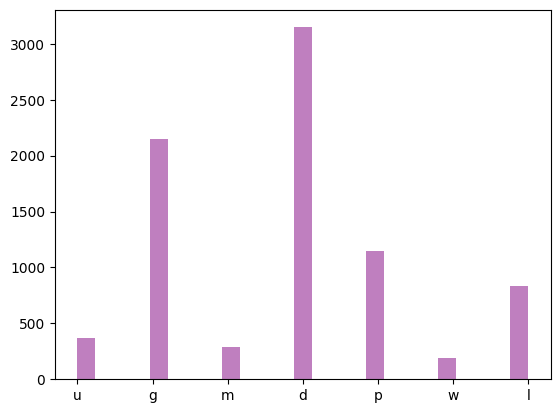

In [5]:
population = df['population']
fig = plt.subplot()
fig.hist(df['habitat'], alpha=0.5, bins=25, color='purple')

In [6]:
dummies = pd.get_dummies(data, prefix=None,prefix_sep='_')
dummies

,edibility_e,edibility_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,True,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
8121,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,True,False,False,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


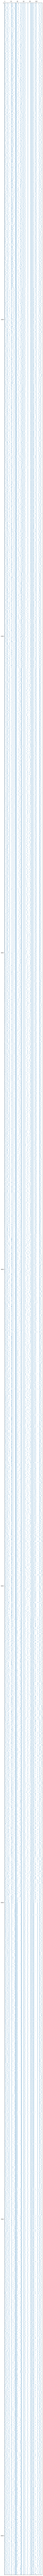

In [7]:
plt.spy(dummies, markersize=1)
fig = plt.gcf()
fig.set_size_inches(60,400)
plt.plot()
plt.show()